In [33]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import collections

from keras import models
from keras import layers

from keras.utils.np_utils import to_categorical

In [2]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor Flow Version: 1.13.1
Keras Version: 2.2.4-tf

Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas 0.24.2
Scikit-Learn 0.21.2


In [3]:
from keras.datasets import reuters

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [15]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [13]:
#decoding newswires back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [14]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [21]:
len(collections.Counter(train_labels))

46

In [25]:
#preparing the data
def vectorize_squences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [26]:
x_train = vectorize_squences(train_data)
x_test = vectorize_squences(test_data)

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [34]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [35]:
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [37]:
#model set up
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
#validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.4443 - acc: 0.6888 - val_loss: 1.3500 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.0991 - acc: 0.7645 - val_loss: 1.1754 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.8728 - acc: 0.8160 - val_loss: 1.0809 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.7062 - acc: 0.8492 - val_loss: 0.9862 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.5696 - acc: 0.8794 - val_loss: 0.9417 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.4625 - acc

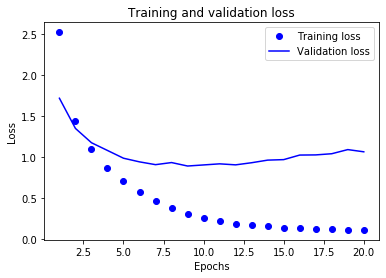

In [41]:
#training and validation loss plot
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

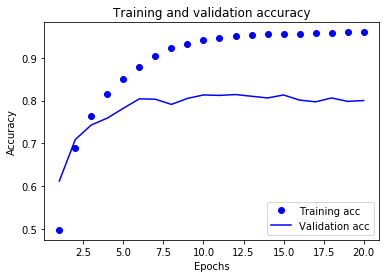

In [42]:
#training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs,acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
#retrain the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 125us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 94us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 99us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
7

In [44]:
results

[1.0224983078607575, 0.7756010686194165]

In [45]:
#try the model on the new data
predictions = model.predict(x_test)

In [47]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

0.9999998

In [51]:
np.argmax(predictions[0])

3